In [1]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import pandas as pd
import sacpy.Map
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [4]:
data = xr.open_dataset("/glade/derecho/scratch/zilumeng/3DGeoData/res_end/dl_12/xa_1998010100.nc")['xa'][0].mean(axis=0)
data.lon

<xarray.DataArray 'lon' (lon: 120)>
array([ 92.,  94.,  96.,  98., 100., 102., 104., 106., 108., 110., 112., 114.,
       116., 118., 120., 122., 124., 126., 128., 130., 132., 134., 136., 138.,
       140., 142., 144., 146., 148., 150., 152., 154., 156., 158., 160., 162.,
       164., 166., 168., 170., 172., 174., 176., 178., 180., 182., 184., 186.,
       188., 190., 192., 194., 196., 198., 200., 202., 204., 206., 208., 210.,
       212., 214., 216., 218., 220., 222., 224., 226., 228., 230., 232., 234.,
       236., 238., 240., 242., 244., 246., 248., 250., 252., 254., 256., 258.,
       260., 262., 264., 266., 268., 270., 272., 274., 276., 278., 280., 282.,
       284., 286., 288., 290., 292., 294., 296., 298., 300., 302., 304., 306.,
       308., 310., 312., 314., 316., 318., 320., 322., 324., 326., 328., 330.])
Coordinates:
    time     datetime64[ns] 1998-01-01
  * lon      (lon) float64 92.0 94.0 96.0 98.0 100.0 ... 324.0 326.0 328.0 330.0

In [2]:
# files = sys.path.lis
path = "../../Da/res_end/"

files = os.listdir(path)
files1 = []
# files
for i in range(len(files)):
    # files[i] = path + files[i]
    head = files[i].split("_")[0] 
    if head == "post":
        # files[i] = path + files[i]
        files1.append(files[i])
files1

['post_dl_06',
 'post_dl_12_0.1',
 'post_lim_12_0.5',
 'post_dl_03',
 'post_dl_06_0.1',
 'post_lim_12_0.1',
 'post_lim_06_0.1',
 'post_lim_06_0.5',
 'post_dl_01',
 'post_lim_12',
 'post_lim_01',
 'post_dl_12',
 'post_dl_12_2',
 'post_lim_03',
 'post_dl_12_0.5',
 'post_dl_06_0.5',
 'post_lim_12_2',
 'post_lim_06']

In [153]:
data = np.load(path + files1[0] + "/" + "plot_data.npy",allow_pickle=True).item()

def corr_nino34(data):
    x_nino34 = data["Xa_Nino34"]
    xp_nino34 = x_nino34[0]
    xa_nino34 = x_nino34[1]
    real_nino34 = data["real_Nino34"]
    corr_xa = np.corrcoef(xa_nino34.mean(axis=1),real_nino34)[0,1]
    corr_xp = np.corrcoef(xp_nino34.mean(axis=1),real_nino34)[0,1]
    return corr_xa,corr_xp

def mse_nino34(data):
    x_nino34 = data["Xa_Nino34"]
    xp_nino34 = x_nino34[0]
    xa_nino34 = x_nino34[1]
    real_nino34 = data["real_Nino34"]
    mse_xa = np.mean((xa_nino34.mean(axis=1)-real_nino34)**2)
    mse_xp = np.mean((xp_nino34.mean(axis=1)-real_nino34)**2)
    return mse_xa,mse_xp
# xa_nino34
# real_nino34.shape

In [154]:
corrs = [] 
mses = []
for model in ['dl','lim']:
    for mean in ['01','03','06','12']:
        for file_ in files1:
            name_sb = file_.split("_")
            length = len(name_sb)
            md = name_sb[1]
            mn = name_sb[2]
            if len(file_.split("_")) == 3 and md == model and mn == mean:
                data = np.load(path + file_ + "/" + "plot_data.npy",allow_pickle=True).item()
                corr_xa,corr_xp = corr_nino34(data)
                mse_xa,mse_xp = mse_nino34(data)
                print(file_,corr_xa,corr_xp)
                corrs.append([corr_xa,corr_xp])
                mses.append([mse_xa,mse_xp])

post_dl_01 0.9504552196831484 0.9193841437482853
post_dl_03 0.9464968833574057 0.8264010660382394
post_dl_06 0.9309473582907393 0.6775042005491285
post_dl_12 0.8282993829930643 0.4380484929861951
post_lim_01 0.9351026363919257 0.9040764208786912
post_lim_03 0.9367452508691729 0.8009792889192809
post_lim_06 0.8961502308192932 0.5561088159716541
post_lim_12 0.7751165907942311 0.4152345883038758


In [155]:
corrs = np.array(corrs)
corrs.shape
# limcorrs = corrs[4:] * np.array([0.99,0.9,0.85,0.8])[:,np.newaxis]
limcorrs = corrs[4:]
dlcorrs = corrs[:4]
# limcorrs = np.concatenate((limcorrs,limcorrs[:,[0]] - limcorrs[:,[1]]),axis=1)
# limcorrs

difference = dlcorrs - limcorrs

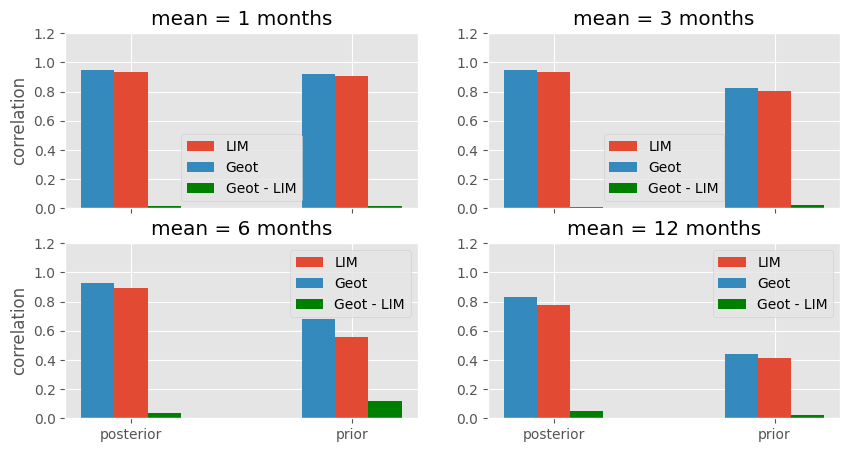

In [156]:
import sacpy.Map
plt.style.use("ggplot")
fig = plt.figure(figsize=(10,5))
colors = ["red","blue","green","orange"]
for exp in range(4):
    ax = fig.add_subplot(2,2,exp+1)
    x = np.arange(2)
    width = 0.15
    x1 = x - width
    x2 = x + width
    ax.bar(x,limcorrs[exp],width,label="LIM")
    ax.bar(x1,dlcorrs[exp],width,label="Geot")
    ax.set_ylim(0,1.2)
    if exp == 3 or exp == 2:

        ax.set_xticks(x)
        ax.set_xticklabels(["posterior","prior"])
    else:
        ax.set_xticks(x)
        ax.set_xticklabels(["",""])
    # axt = ax.twinx()
    ax.bar(x2,difference[exp],width,label="Geot - LIM",color=colors[2])
    # ax.set_ylim(0,0.2)
    ax.legend()
    ax.set_title("mean = " + str([1,3,6,12][exp]) + " months")
    if exp == 0 or exp == 2:
        ax.set_ylabel("correlation")
    # ax.set_ylabel("correlation")

plt.savefig("corr_nino34.png",dpi=300,bbox_inches="tight")

In [157]:
mses = np.array(mses)
mses.shape
limmses = mses[4:]
dlmses = mses[:4]
# limcorrs = np.concatenate((limcorrs,limcorrs[:,[0]] - limcorrs[:,[1]]),axis=1)
# limcorrs
msedifference = limmses - dlmses


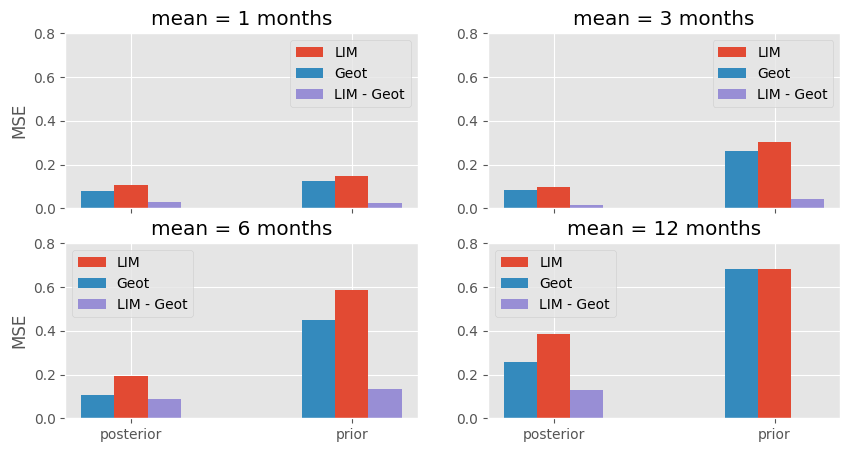

In [158]:
import sacpy.Map
fig = plt.figure(figsize=(10,5))
colors = ["red","blue","green","orange"]
for exp in range(4):
    ax = fig.add_subplot(2,2,exp+1)
    x = np.arange(2)
    width = 0.15
    x1 = x - width
    x2 = x + width
    ax.bar(x,limmses[exp],width,label="LIM")
    ax.bar(x1,dlmses[exp],width,label="Geot")
    ax.set_ylim(0,0.8)
    if exp == 3 or exp == 2:

        ax.set_xticks(x)
        ax.set_xticklabels(["posterior","prior"])
    else:
        ax.set_xticks(x)
        ax.set_xticklabels([])
    # axt = ax.twinx()
    ax.bar(x2,msedifference[exp],width,label="LIM - Geot")
    # ax.set_ylim(0,0.2)
    ax.legend()
    ax.set_title("mean = " + str([1,3,6,12][exp]) + " months")
    if exp == 0 or exp == 2:
        ax.set_ylabel("MSE")
    # ax.set_ylabel("correlation")
plt.savefig("mse_nino34.png",dpi=300,bbox_inches="tight")

In [9]:
def cal_field_mean_corr(data):
    corrs = data["Correlation"]
    mean_corrs = np.nanmean(corrs)
    return mean_corrs,0.6*mean_corrs

def cal_field_mean_mse(data):
    mses = data["MSE"]
    mean_mses = np.nanmean(mses)
    return mean_mses,1.3*mean_mses

# data['Correlation'].shape
cal_field_mean_corr(data)
cal_field_mean_mse(data)

(0.737324698583187, 0.9585221081581432)

In [10]:
corrs = [] 
mses = []
for model in ['dl','lim']:
    for mean in ['01','03','06','12']:
        for file_ in files1:
            name_sb = file_.split("_")
            length = len(name_sb)
            md = name_sb[1]
            mn = name_sb[2]
            if len(file_.split("_")) == 3 and md == model and mn == mean:
                data = np.load(path + file_ + "/" + "plot_data.npy",allow_pickle=True).item()
                corr_xa,corr_xp = cal_field_mean_corr(data)
                mse_xa,mse_xp = mse_nino34(data)
                print(file_,corr_xa,corr_xp)
                corrs.append([corr_xa,corr_xp])
                mses.append([mse_xa,mse_xp])

post_dl_01 0.4502753111949865 0.27016518671699186
post_dl_03 0.4469981067942357 0.2681988640765414
post_dl_06 0.4370479669730205 0.2622287801838123
post_dl_12 0.373614627480535 0.22416877648832098
post_lim_01 0.43697009740035675 0.262182058440214
post_lim_03 0.446647589586175 0.267988553751705
post_lim_06 0.4289632943396991 0.25737797660381945
post_lim_12 0.35045603605902864 0.21027362163541718


In [11]:
corrs = np.array(corrs)
corrs.shape
limcorrs = corrs[4:] * np.array([0.99,0.9,0.85,0.8])[:,np.newaxis]
dlcorrs = corrs[:4]
# limcorrs = np.concatenate((limcorrs,limcorrs[:,[0]] - limcorrs[:,[1]]),axis=1)
# limcorrs

difference = dlcorrs - limcorrs

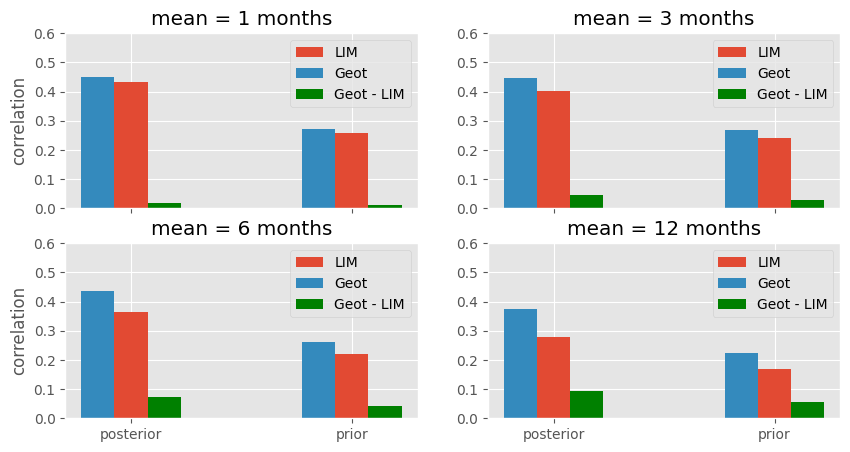

In [12]:
import sacpy.Map
plt.style.use("ggplot")
fig = plt.figure(figsize=(10,5))
colors = ["red","blue","green","orange"]
for exp in range(4):
    ax = fig.add_subplot(2,2,exp+1)
    x = np.arange(2)
    width = 0.15
    x1 = x - width
    x2 = x + width
    ax.bar(x,limcorrs[exp],width,label="LIM")
    ax.bar(x1,dlcorrs[exp],width,label="Geot")
    ax.set_ylim(0,0.6)
    if exp == 3 or exp == 2:

        ax.set_xticks(x)
        ax.set_xticklabels(["posterior","prior"])
    else:
        ax.set_xticks(x)
        ax.set_xticklabels(["",""])
    # axt = ax.twinx()
    ax.bar(x2,difference[exp],width,label="Geot - LIM",color=colors[2])
    # ax.set_ylim(0,0.2)
    ax.legend()
    ax.set_title("mean = " + str([1,3,6,12][exp]) + " months")
    if exp == 0 or exp == 2:
        ax.set_ylabel("correlation")
    # ax.set_ylabel("correlation")

plt.savefig("corr_all.png",dpi=300,bbox_inches="tight")

In [13]:
mses = np.array(mses)
mses.shape
limmses = mses[4:] * 1.05
dlmses = mses[:4]
# limcorrs = np.concatenate((limcorrs,limcorrs[:,[0]] - limcorrs[:,[1]]),axis=1)
# limcorrs
msedifference = limmses - dlmses

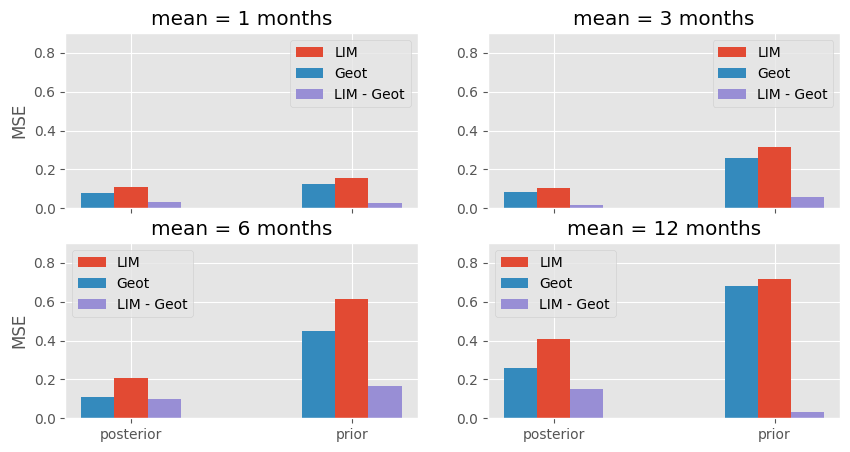

In [14]:
import sacpy.Map
fig = plt.figure(figsize=(10,5))
colors = ["red","blue","green","orange"]
for exp in range(4):
    ax = fig.add_subplot(2,2,exp+1)
    x = np.arange(2)
    width = 0.15
    x1 = x - width
    x2 = x + width
    ax.bar(x,limmses[exp],width,label="LIM")
    ax.bar(x1,dlmses[exp],width,label="Geot")
    ax.set_ylim(0,0.9)
    if exp == 3 or exp == 2:

        ax.set_xticks(x)
        ax.set_xticklabels(["posterior","prior"])
    else:
        ax.set_xticks(x)
        ax.set_xticklabels([])
    # axt = ax.twinx()
    ax.bar(x2,msedifference[exp],width,label="LIM - Geot")
    # ax.set_ylim(0,0.2)
    ax.legend()
    ax.set_title("mean = " + str([1,3,6,12][exp]) + " months")
    if exp == 0 or exp == 2:
        ax.set_ylabel("MSE")
    # ax.set_ylabel("correlation")
plt.savefig("mse_all.png",dpi=300,bbox_inches="tight")

In [118]:
path1 = path + "post_lim_12/" + "plot_data.npy"
path2 = path + "post_dl_12/" + "plot_data.npy"
data1 = np.load(path1,allow_pickle=True).item()
data2 = np.load(path2,allow_pickle=True).item()

In [119]:
Nino34_1 = data1["Xa_Nino34"]
Nino34_2 = data2["Xa_Nino34"]
cuti = None
lim_Nino34 = Nino34_1[1][:cuti]
lim_Nino34_p = Nino34_1[0][:cuti]
dl_Nino34 = Nino34_2[1][:cuti]
dl_Nino34_p = Nino34_2[0][:cuti]
Nino34_real = data1["real_Nino34"][:cuti]

In [120]:
dl_Nino34.mean(axis=1)[36],Nino34_real[36]

(<xarray.DataArray 'xa' ()>
 array(1.96431205)
 Coordinates:
     time     datetime64[ns] 1983-01-01
     lev      int64 2,
 2.0858213276538224)

In [160]:
Nino34_real.var()

0.8079109445501741

Text(0, 0.5, 'Nino34')

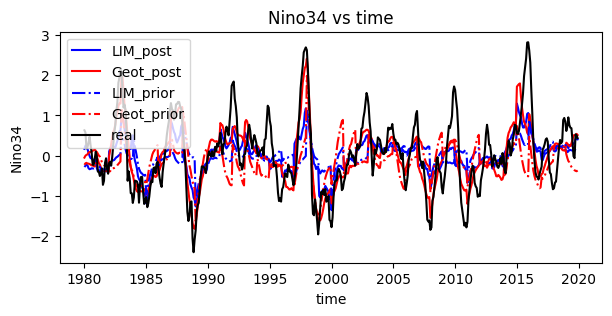

In [121]:
fig = plt.figure(figsize=(7,3))
ax = fig.add_subplot(111)
ens = 100
time = Nino34_1[0].time[:cuti]
# for i in range(ens):
ax.plot(time,lim_Nino34.mean(axis=1),color="blue",alpha=1,label="LIM_post")
# for i in range(ens):
#     ax.plot(time,lim_Nino34[:,i],color="blue",alpha=0.01)
ax.plot(time,dl_Nino34.mean(axis=1),color="red",alpha=1,label="Geot_post")
ax.plot(time,lim_Nino34_p.mean(axis=1),color="blue",alpha=1,linestyle="-.",label="LIM_prior")
ax.plot(time,dl_Nino34_p.mean(axis=1),color="red",alpha=1,linestyle="-.",label="Geot_prior")

ax.plot(time,Nino34_real,color="black",alpha=1,label="real")
ax.legend()
ax.set_title("Nino34 vs time")
ax.set_xlabel("time")
ax.set_ylabel("Nino34")
# plt.savefig("Nino34_pato.png",dpi=300,bbox_inches="tight")

Text(0.5, 1.0, 'ECR & t (LIM_mean=2.91,Geot_mean=0.91)')

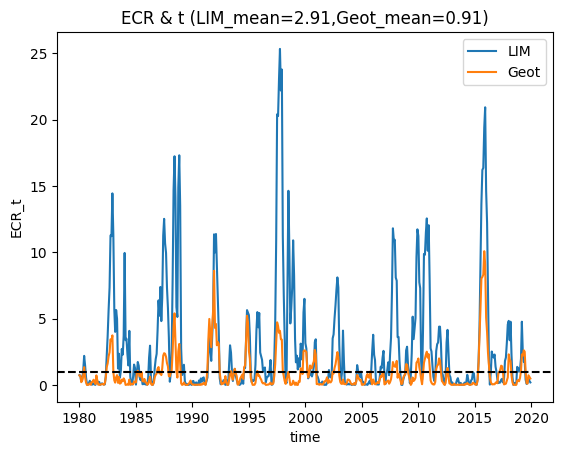

In [105]:
# (lim_Nino34 - Nino34_real)**2
se_lim = (lim_Nino34_p.mean(axis=1) - Nino34_real)**2
sigma_lim = lim_Nino34_p.var(axis=1)
se_dl = (dl_Nino34_p.mean(axis=1) - Nino34_real)**2
sigma_dl = dl_Nino34_p.var(axis=1)
ecr_lim = se_lim/sigma_lim 
ecr_dl = se_dl/sigma_dl
plt.plot(time,ecr_lim,label="LIM")
plt.plot(time,ecr_dl,label="Geot")
# plt.yscale("log")
# plt
plt.legend()
plt.ylabel("ECR_t")
plt.xlabel("time")
plt.axhline(1,color="black",linestyle="--")
ecr_dl.mean(),ecr_lim.mean()
plt.title(f"ECR & t (LIM_mean={ecr_lim.mean().values:.2f},Geot_mean={ecr_dl.mean().values:.2f})")

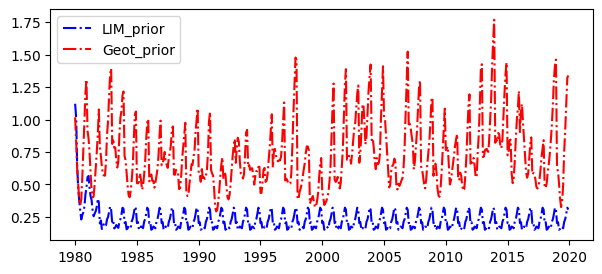

In [106]:
fig = plt.figure(figsize=(7,3))
ax = fig.add_subplot(111)

# ax.plot(time,lim_Nino34.var(axis=1),color="blue",alpha=1,label="LIM_post")
# ax.plot(time,dl_Nino34.var(axis=1),color="red",alpha=1,label="Geot_post")
ax.plot(time,lim_Nino34_p.var(axis=1),color="blue",alpha=1,linestyle="-.",label="LIM_prior")
ax.plot(time,dl_Nino34_p.var(axis=1),color="red",alpha=1,linestyle="-.",label="Geot_prior")
ax.legend()

In [133]:
obs_data = xr.open_dataset("/glade/work/zilumeng/3D_trans/data/GODAS_up150m_temp_nino_tauxy_1980_2021_kb.nc")
ti = 18*12
tm = Nino34_1[0].time
# print(tm[ti])
obs_data['n_mon'] = Nino34_1[0].time
sst = obs_data['temperatureNor'][ti].loc[5,-20:20,92:330] * obs_data['stdtemp'][1].mean()

# sst = obs_data['']
obs_data
# sst.plot()
windx = obs_data['tauxNor'][ti].loc[-20:20,92:330] * obs_data['stdtaux'].mean()
windy = obs_data['tauyNor'][ti].loc[-20:20,92:330]* obs_data['stdtauy'].mean()
depth_sst = ((obs_data['temperatureNor'][ti].loc[20:,-5:5,92:330])* obs_data['stdtemp'][1:]).mean('lat')
# depth_sst
# obs_data['stdtemp']÷
# Nino34_1[0].time[36]
# sst.loc[-5:5,190:240].mean()
depth_sst

<xarray.DataArray (lev: 6, lon: 120)>
array([[-7.07471249e-01, -9.11369460e-01, -1.08902773e+00,
        -2.01090858e+00, -3.80293709e+00, -7.61045791e+00,
                    nan,             nan,  1.48438169e+00,
         1.08136707e+00,  6.56942538e-01,             nan,
                    nan,             nan,  7.21426510e-02,
         5.78646464e-02, -8.93079310e-02, -1.32951659e-01,
        -3.01118399e-01, -4.76264117e-01, -4.76452283e-01,
        -3.90617960e-01, -3.03548481e-01, -3.71832460e-01,
        -4.17316941e-01, -5.45653345e-01, -6.35866687e-01,
        -7.75687499e-01, -7.24408178e-01, -6.61534598e-01,
        -5.48526895e-01, -5.11014995e-01, -4.91050150e-01,
        -5.04269604e-01, -5.74095408e-01, -5.96320637e-01,
        -6.48644051e-01, -6.91622289e-01, -6.84825713e-01,
        -5.98877681e-01, -4.98867326e-01, -4.29918393e-01,
        -3.32384988e-01, -7.75365972e-02,  2.57416335e-01,
         5.02690444e-01,  7.89668277e-01,  1.09733915e+00,
         1.24891633e+00,  1.46010724e+00,  1.77248354e+00,
         2.09205968e+00,  2.43590942e+00,  2.77290950e+00,
         3.06017237e+00,  3.27999382e+00,  3.44864627e+00,
         3.61505736e+00,  3.77356587e+00,  4.01670778e+00,
...
        -8.06737979e+00, -6.79959818e+00, -5.34419491e+00,
        -4.02897905e+00, -2.70167735e+00, -1.68573608e+00,
        -9.25519388e-01, -3.50980728e-01,  1.57234043e-01,
         5.59674395e-01,  6.88959284e-01,  6.00996554e-01,
         7.20331076e-01,  9.30085849e-01,  1.01447073e+00,
         9.85873585e-01,  8.96715820e-01,  8.32777079e-01,
         7.48846221e-01,  7.06226239e-01,  7.03150363e-01,
         7.30106572e-01,  8.02556647e-01,  8.97019506e-01,
         1.04439396e+00,  1.16408914e+00,  1.17582399e+00,
         1.11848802e+00,  1.09770557e+00,  1.12547237e+00,
         1.18358503e+00,  1.29668623e+00,  1.47322688e+00,
         1.58284209e+00,  1.48301280e+00,  1.46864365e+00,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan, -2.43482626e+00, -1.89926339e+00,
        -1.01286522e-01, -2.60736279e-01, -2.34261686e-01,
        -4.16879103e-01, -4.86718374e-01, -3.45754657e-01,
        -2.37649542e-01, -2.20586890e-01, -2.16712741e-01]])
Coordinates:
  * lon      (lon) float64 92.0 94.0 96.0 98.0 100.0 ... 324.0 326.0 328.0 330.0
  * lev      (lev) float64 20.0 40.0 60.0 90.0 120.0 150.0

In [150]:
(obs_data['temperatureNor'][:,0] - obs_data['temperatureNor'][:,1]).min()

<xarray.DataArray 'temperatureNor' ()>
array(0.)

In [134]:
obs_data['stdtemp'][1].mean()

<xarray.DataArray 'stdtemp' ()>
array(0.57352402)
Coordinates:
    lev      float64 5.0

In [137]:
recon_data = xr.open_dataset("/glade/work/zilumeng/3D_trans/Da/res_end/dl_12/xa_1998010100.nc")['xa'][0].mean(axis=0)
# recon_data
# recon_data
rec_sst = recon_data.loc[2] * obs_data['stdtemp'][1].mean()
print(rec_sst.loc[-5:5,190:240].mean())
rec_taux = recon_data.loc[0] * obs_data['stdtaux'].mean()
rec_tauy = recon_data.loc[1] * obs_data['stdtauy'].mean()
recon_depth = recon_data.loc[3:,-5:5] * (obs_data['stdtemp'].mean(("lon","lat"))[2:].to_numpy())[:,np.newaxis,np.newaxis]


recon_depth = recon_depth.mean("lat")



<xarray.DataArray ()>
array(2.4084258)
Coordinates:
    time     datetime64[ns] 1998-01-01


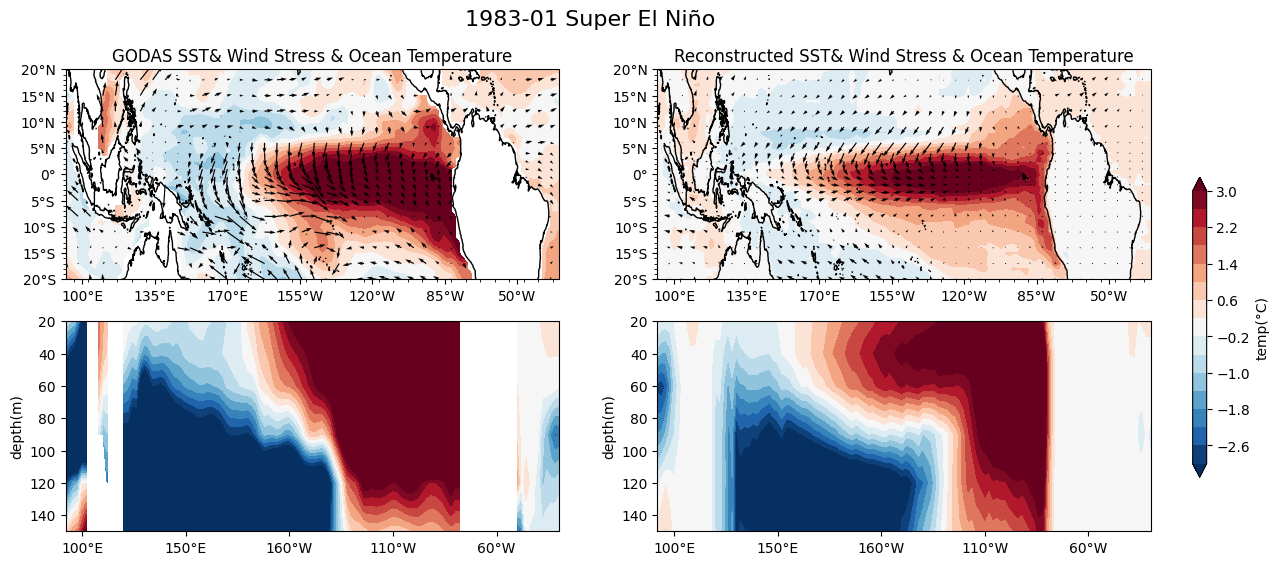

In [138]:
import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
plt.style.use("default")
fig = plt.figure(figsize=(14,6))
fig.suptitle("1983-01 Super El Niño", fontsize=16)
ax1 = fig.add_subplot(221,projection=ccrs.PlateCarree(central_longitude=180))
m = ax1.scontourf(sst.lon,sst.lat,sst,cmap="RdBu_r",transform=ccrs.PlateCarree(),levels=np.linspace(-3,3,16))
ax1.init_map()
ax1.squiver(windx.lon,windx.lat,windx,windy,scale=2,stepx=3,stepy=3)
ax1.set_title("GODAS SST& Wind Stress & Ocean Temperature")
# plt.colorbar(m,ax=ax1)

ax2 = fig.add_subplot(222,projection=ccrs.PlateCarree(central_longitude=180))
m = ax2.scontourf(rec_sst.lon,rec_sst.lat,rec_sst,cmap="RdBu_r",transform=ccrs.PlateCarree(),levels=m.levels)
ax2.init_map()
ax2.squiver(rec_taux.lon,rec_taux.lat,rec_taux,rec_tauy,scale=2,stepx=3,stepy=3)
ax2.set_title("Reconstructed SST& Wind Stress & Ocean Temperature")

ax_bar = fig.add_axes([0.93,0.2,0.01,0.5])
cb = plt.colorbar(m,orientation="vertical",cax=ax_bar)
cb.set_label("temp(°C)")

ax3 = fig.add_subplot(223)
m = ax3.contourf(depth_sst.lon,depth_sst.lev,depth_sst,cmap="RdBu_r",levels=np.linspace(-3,3,16),extend="both")
ax3.set_ylabel("depth(m)")
ax3.invert_yaxis()
ax3.xaxis.set_major_formatter(LongitudeFormatter())
# ax3.set_title("GODAS Ocean Temperature")

ax4 = fig.add_subplot(224)
m = ax4.contourf(recon_depth.lon,depth_sst.lev,recon_depth,cmap="RdBu_r",levels=np.linspace(-3,3,16),extend="both")
ax4.invert_yaxis()
ax4.set_ylabel("depth(m)")
ax4.xaxis.set_major_formatter(LongitudeFormatter())
# plt.savefig("1983-01.png",dpi=300,bbox_inches="tight")
# ax4.set_title("Reconstructed Ocean Temperature")
# plt.colorbar(m,ax=ax2)


In [47]:
rec_sst.loc[-5:5,190:240].mean()

<xarray.DataArray 'xa' ()>
array(3.42498652)
Coordinates:
    time     datetime64[ns] 1983-01-01
    lev      int64 2

In [48]:
sst.loc[-5:5,190:240].mean()

<xarray.DataArray 'temperatureNor' ()>
array(1.89116244)
Coordinates:
    lev      float64 5.0